In [ ]:
cd /content/drive/My Drive/OD segmentation/ODSegmentation

/content/drive/My Drive/OD segmentation/ODSegmentation


In [ ]:
import numpy as np
#import scipy.io as sio
import scipy.misc
from keras.preprocessing import image
from skimage.transform import rotate, resize
from skimage.measure import label, regionprops
from time import time
from utils_Mnet import pro_process, BW_img, disc_crop
import matplotlib.pyplot as plt
from skimage.io import imsave
from PIL import Image

import cv2
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import Model_DiscSeg as DiscModel
import Model_MNet as MNetModel

In [ ]:
DiscROI_size = 400
DiscSeg_size = 640
CDRSeg_size = 400

train_data_type = '.tif'
mask_data_type ='.bmp'

Original_validation_img_path = 'data/DRIVEdataset/'

#valiImage_save_path='data/try/'

#PolarTrainImage_save_path='data/PolarTrainImage_save_path/'
seg_result_save_path = '/content/drive/My Drive/OD segmentation/ODSegmentation/ODresult/'

if not os.path.exists(seg_result_save_path):
    os.makedirs(seg_result_save_path)
    

if not os.path.exists(valiImage_save_path):
    os.makedirs(valiImage_save_path)        


if not os.path.exists(PolarTrainImage_save_path):
    os.makedirs(PolarTrainImage_save_path)   
    

In [ ]:
file_train_list = [file for file in os.listdir(Original_validation_img_path) if file.lower().endswith(train_data_type)]

DiscSeg_model = DiscModel.DeepModel(size_set=DiscSeg_size)
DiscSeg_model.load_weights('Model_DiscSeg_ORIGA_pretrain.h5')

#CDRSeg_model = MNetModel.DeepModel(size_set=CDRSeg_size)
#CDRSeg_model.load_weights('Model_MNet_ORIGA_pretrain.h5')

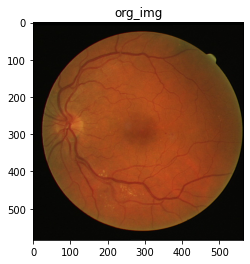

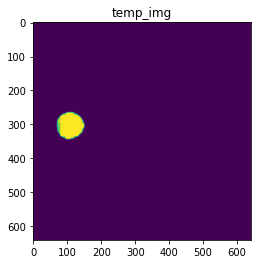

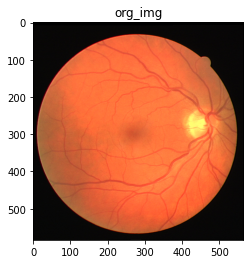

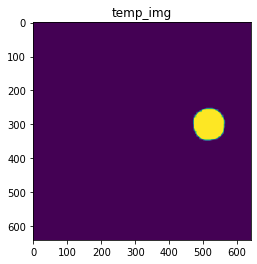

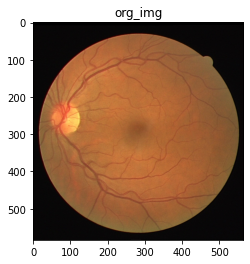

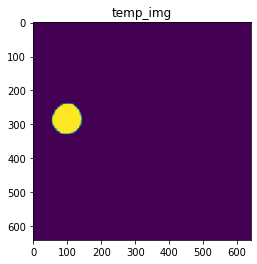

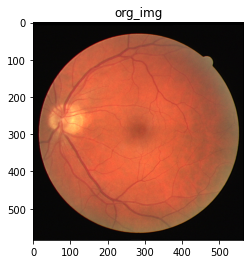

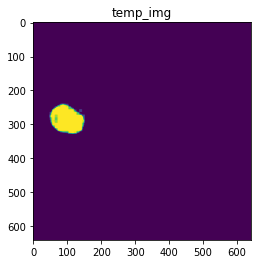

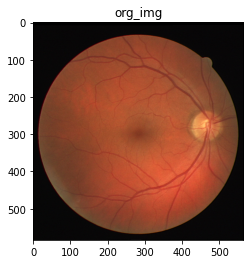

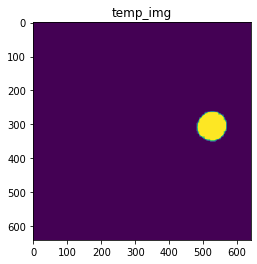

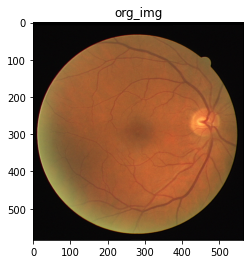

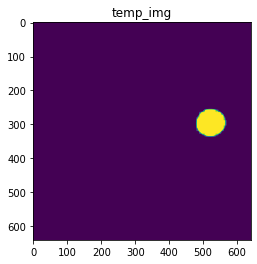

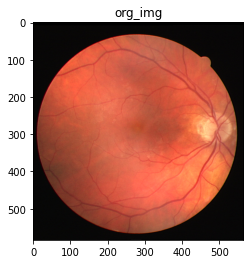

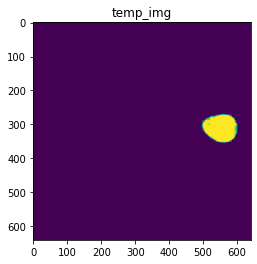

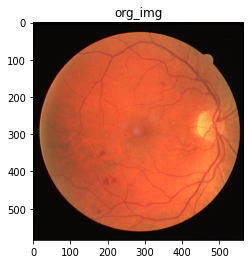

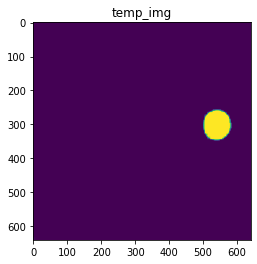

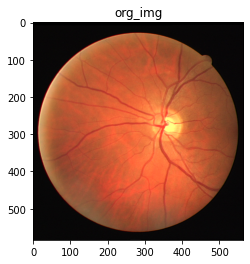

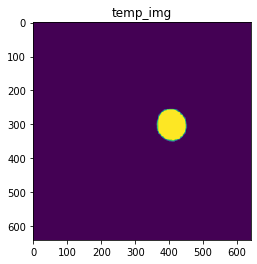

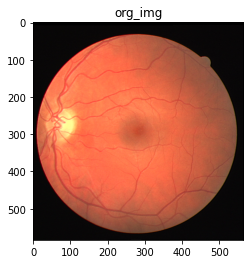

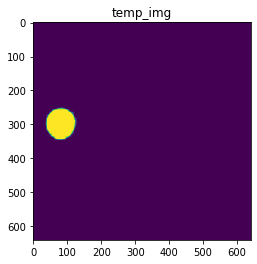

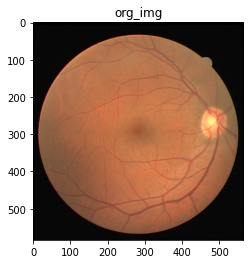

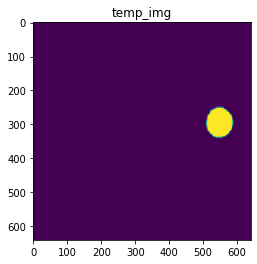

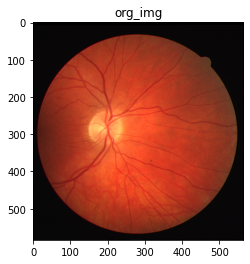

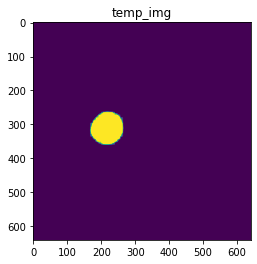

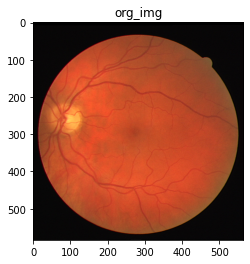

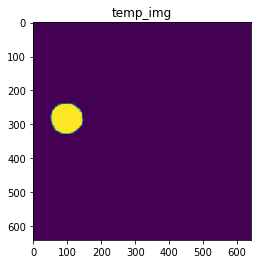

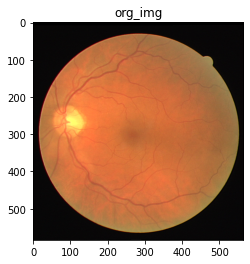

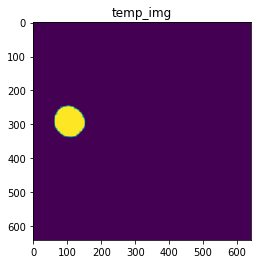

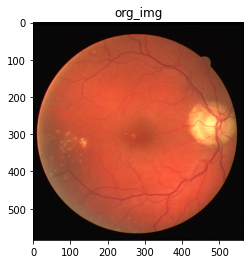

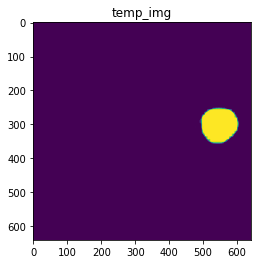

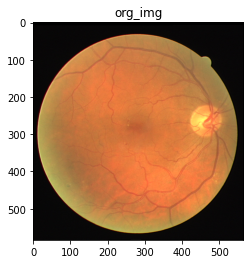

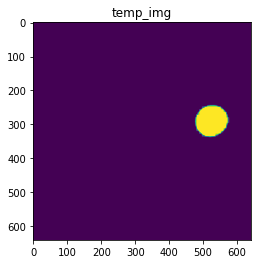

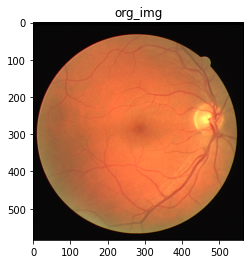

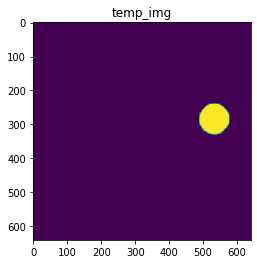

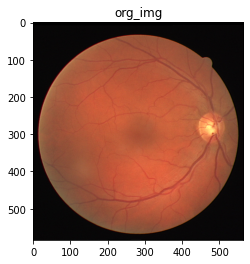

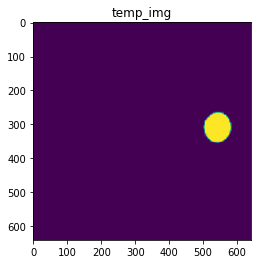

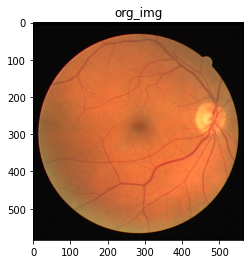

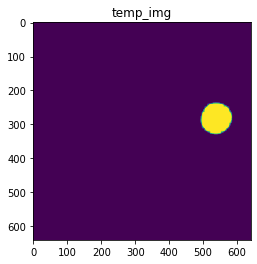

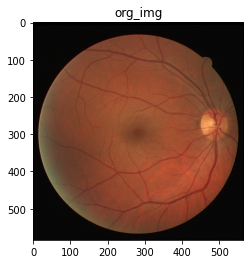

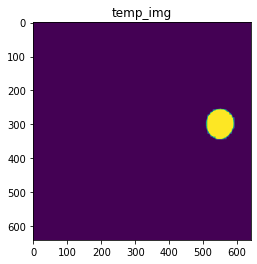

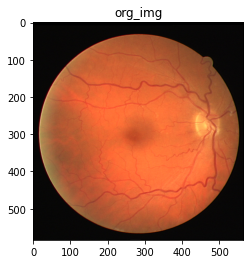

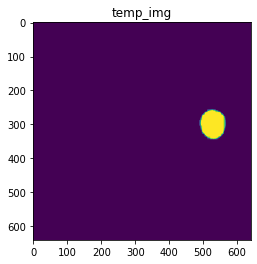

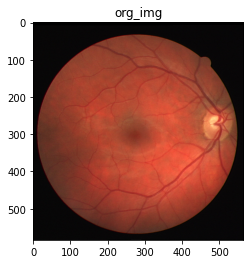

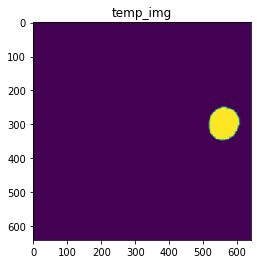

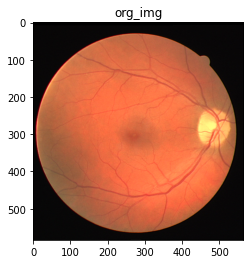

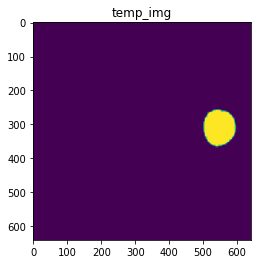

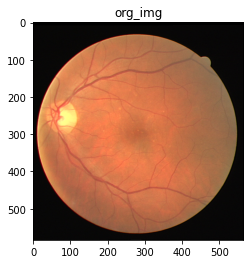

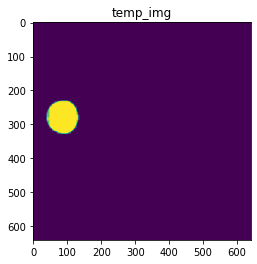

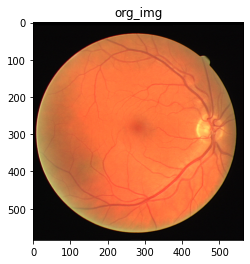

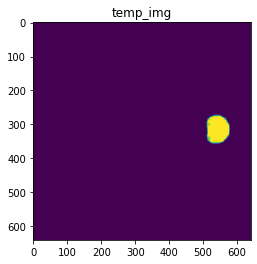

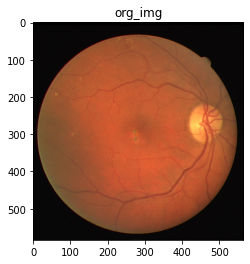

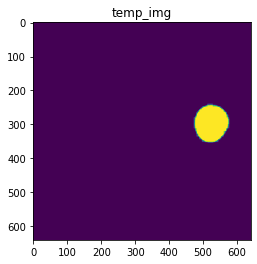

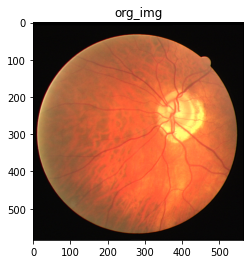

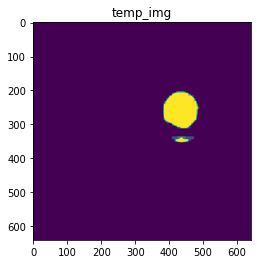

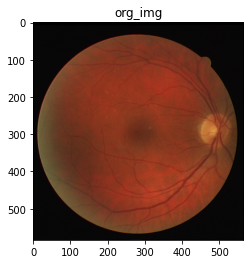

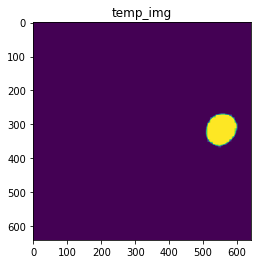

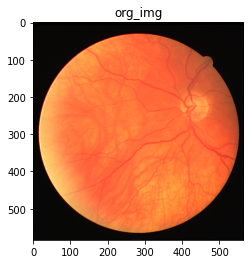

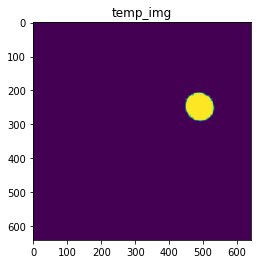

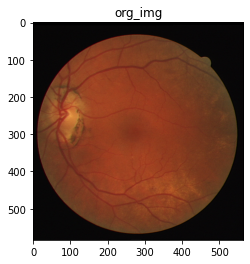

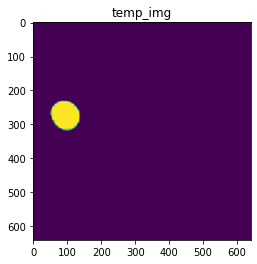

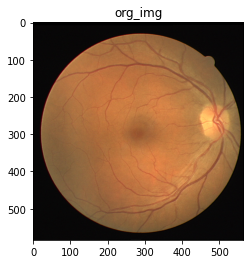

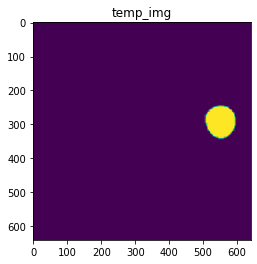

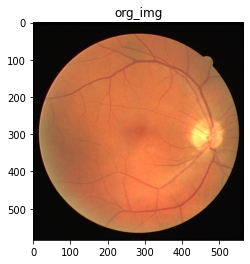

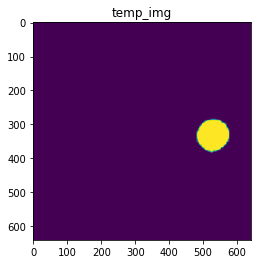

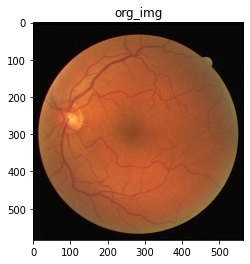

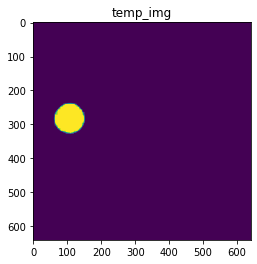

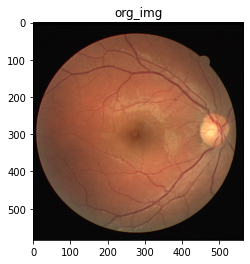

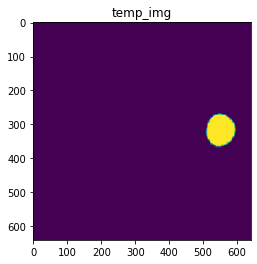

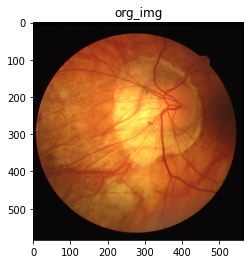

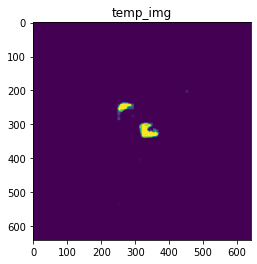

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: /content/drive/My Drive/OD segmentation/ODSegmentation/ODresult/34_training.tif is a low contrast image


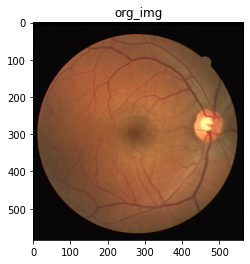

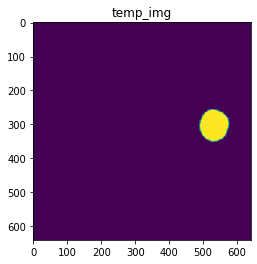

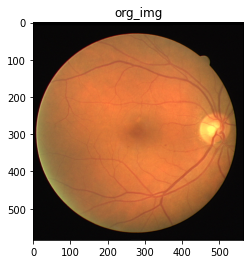

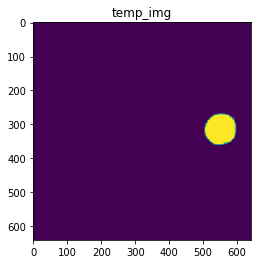

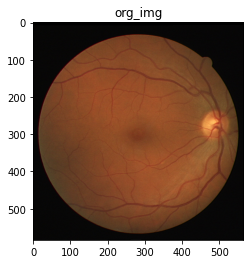

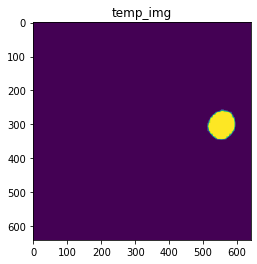

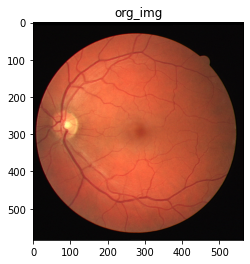

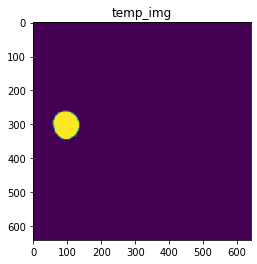

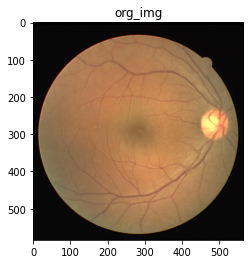

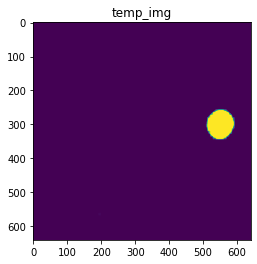

In [ ]:
for lineIdx in range(0, len(file_train_list)):
    temp_txt = [elt.strip() for elt in file_train_list[lineIdx].split(',')]

    org_img = np.asarray(image.load_img(Original_validation_img_path + temp_txt[0]))
    plt.imshow(org_img)
    plt.title('org_img')
    plt.show()

    
    # Disc region detection by U-Net
    temp_org_img = resize(org_img, (DiscSeg_size, DiscSeg_size, 3)) 

 
    temp_org_img = np.reshape(temp_org_img, (1,) + temp_org_img.shape)*255

    [prob_6, prob_7, prob_8, prob_9, prob_10] = DiscSeg_model.predict([temp_org_img])
    
    OD = np.squeeze(np.clip(prob_10*255,0,255).astype('uint8'));
    
    plt.imshow(OD)
    plt.title('temp_img')
    plt.show()
    
    #print(OD.size)

    
    OD=OD /OD.max()
    OD=255*OD
    OD=OD.astype(np.uint8)
    OD[OD==255]=200
    OD[OD==0]=0   
    OD[OD==200]=255   
    OD[(OD<200) & (OD>0)]=128  
    
    imsave(seg_result_save_path+temp_txt[0],(OD))